In [1]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:99% !important;}
div.cell.code_cell.rendered{width:90%;}
div.CodeMirror {font-family:Consolas; font-size:20pt;}
div.output {font-size:20pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:19pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
span.toc-item-num{display:none;}
div.text_cell_render ul li{font-size:16pt;padding:5px;}
div.CodeMirror-lines > div {padding-left:10px;}
table.dataframe{font-size:19px;}
</style>
"""))

In [1]:
import numpy as np
import pandas as pd
import sys
from tensorflow.keras import utils # utils.to_categorical
from tensorflow.keras.models import Sequential # 모델생성
from tensorflow.keras.layers import Dense, Input
import matplotlib.pyplot as plt

# 로지스틱회귀분석(이진분류)
## 1. 데이터셋 생성 & 전처리

In [11]:
df = pd.read_csv('data/pima-indians-diabetes.csv', comment='#', header=None)
df.values[:2]
# 결측치 없으므로, csv파일을 바로 넘파이 배열로 읽어올 예정

array([[  6.   , 148.   ,  72.   ,  35.   ,   0.   ,  33.6  ,   0.627,
         50.   ,   1.   ],
       [  1.   ,  85.   ,  66.   ,  29.   ,   0.   ,  26.6  ,   0.351,
         31.   ,   0.   ]])

In [9]:
# np.set_printoptions(threshold=sys.maxsize)

In [ ]:
# 1. 임신횟수
# 2. 2시간내 포도당 농도
# 3. 혈압
# 4. 피부접힘 두께
# 5. 인슐린수치
# 6. BMI체질량지수
# 7. 가족력
# 8. 나이
# 9. 당뇨병발병여부

In [2]:
# csv파일을 numpy 배열로 읽어오기 np.loadtxt(), np.genfromtxt() #이 있는 행은 제외하여 읽어옴
dataset = np.loadtxt('data/pima-indians-diabetes.csv', delimiter=',')
dataset.shape

(768, 9)

In [7]:
# 학습데이터셋(학습용 데이터:train dataset) : 모델 학습시 사용
X_train = dataset[:700, :-1]
y_train = dataset[:700, -1]
# 테스트데이터셋(시험용 데이터:test dataset) : 모델 평가시 사용
X_test = dataset[700:, :-1]
y_test = dataset[700:, -1]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((700, 8), (700,), (68, 8), (68,))

## 2. 모델 구성

In [30]:
model = Sequential()
model.add(Input(shape=(8,)))
model.add(Dense(units=12, activation='relu'))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 12)                108       
                                                                 
 dense_20 (Dense)            (None, 8)                 104       
                                                                 
 dense_21 (Dense)            (None, 1)                 9         
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


## 3. 학습과정 설정

In [31]:
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

## 4. 학습

In [32]:
hist = model.fit(X_train, y_train, # 훈련데이터
                 epochs=200,
                 # batch_size=350,
                 # validation_split=0.2 # 검증 데이터 비율(훈련데이터셋 중 20%를 검증용 데이터로)
                 verbose=0
                )

## 5. 모델 평가하기(학습과정보기, 평가)

In [22]:
hist.history.keys()

dict_keys(['loss', 'binary_accuracy'])

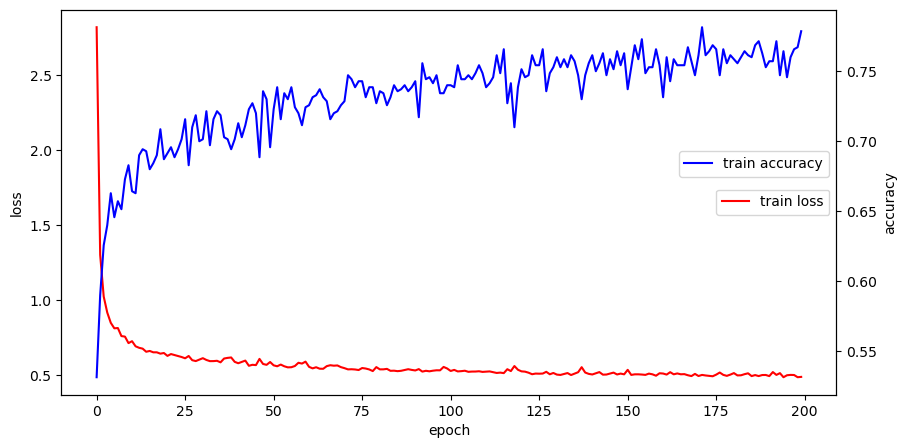

In [33]:
# 학습과정 표시하기(validation dataset 없는 경우)
fig, loss_ax = plt.subplots(figsize=(10,5))
loss_ax.plot(hist.history['loss'], 'r', label='train loss')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax = loss_ax.twinx()
acc_ax.plot(hist.history['binary_accuracy'], 'b', label='train accuracy')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='center right')
acc_ax.legend(bbox_to_anchor=(0.999, 0.65))
plt.show()

In [34]:
# 모델 평가(X)
model.evaluate(X_train, y_train)

22/22 [==============================] - 0s 3ms/step - loss: 0.4889 - binary_accuracy: 0.7771


[0.4889054596424103, 0.7771428823471069]

In [35]:
# 모델 평가(o)
score = model.evaluate(X_test, y_test)
print("loss : {}, 정확도 : {}%".format(score[0], score[1]*100))

3/3 [==============================] - 0s 3ms/step - loss: 0.6064 - binary_accuracy: 0.7941
loss : 0.6064150929450989, 정확도 : 79.41176295280457%


## 6. 모델 사용하기

In [45]:
X_train[10], y_train[10]

(array([  4.   , 110.   ,  92.   ,   0.   ,   0.   ,  37.6  ,   0.191,
         30.   ]),
 0.0)

In [39]:
model.predict([[6, 148, 72, 35, 0, 33.6, 0.6, 50]])

1/1 [==============================] - 0s 31ms/step


array([[0.76793426]], dtype=float32)

In [46]:
(model.predict([[4, 110, 92, 0, 0, 37.6, 0.191, 30],
                   [6, 148, 72, 35, 0, 33.6, 0.6, 45]]) > 0.5).astype(int)

1/1 [==============================] - 0s 31ms/step


array([[0],
       [1]])

## 7. 교차표
- 테스트 데이터셋의 실제값(y_test)과 예측값

In [54]:
y_hat = (model.predict(X_test)>0.5).astype(float)
cnt1=0; cnt2=0; cnt3=0; cnt4=0
# y_hat.shape, y_test.shape
for h, y in zip(y_hat.reshape(-1), y_test.reshape(-1)):
    if h==1.0 and y==1.0:
        cnt1 += 1
    elif y==1.0 and h==0.0:
        cnt2 += 1
    elif y==0.0 and h==1.0:
        cnt3 += 1
    else:
        cnt4 += 1
print(cnt1, cnt2)
print(cnt3, cnt4)

3/3 [==============================] - 0s 2ms/step
17 10
4 37


In [60]:
ctab = pd.crosstab(y_test, y_hat.reshape(-1))
ctab.index.name = '실제값'
ctab.columns.name='예측값'
ctab

예측값,0.0,1.0
실제값,,
0.0,37,4
1.0,10,17
